In [ ]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d mdsaymonahammad112/medicinal-plants

Dataset URL: https://www.kaggle.com/datasets/mdsaymonahammad112/medicinal-plants
License(s): unknown
100% 1.77G/1.78G [00:22<00:00, 127MB/s]
100% 1.78G/1.78G [00:22<00:00, 84.2MB/s]


In [ ]:
!unzip /content/medicinal-plants.zip

Archive:  /content/medicinal-plants.zip
  inflating: Medicinal Plants/Test/Aloevera/IMG_20241003_110044.jpg  
  inflating: Medicinal Plants/Test/Aloevera/IMG_20241003_110420.jpg  
  inflating: Medicinal Plants/Test/Aloevera/IMG_20241003_110427.jpg  
  inflating: Medicinal Plants/Test/Aloevera/IMG_20241003_110430.jpg  
  inflating: Medicinal Plants/Test/Aloevera/IMG_20241003_110442.jpg  
  inflating: Medicinal Plants/Test/Aloevera/IMG_20241003_110444.jpg  
  inflating: Medicinal Plants/Test/Aloevera/IMG_20241003_110451.jpg  
  inflating: Medicinal Plants/Test/Aloevera/IMG_20241003_110500.jpg  
  inflating: Medicinal Plants/Test/Aloevera/IMG_20241003_110506.jpg  
  inflating: Medicinal Plants/Test/Aloevera/IMG_20241003_110508.jpg  
  inflating: Medicinal Plants/Test/Aloevera/IMG_20241003_110522.jpg  
  inflating: Medicinal Plants/Test/Aloevera/IMG_20241003_110525.jpg  
  inflating: Medicinal Plants/Test/Aloevera/IMG_20241003_110527.jpg  
  inflating: Medicinal Plants/Test/Aloevera/IMG_20

In [ ]:
import os
import shutil
from PIL import Image

def merge_and_rename_images(input_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for set_name in ['Train', 'Test', 'Validation']:
        for class_name in ['Bohera', 'Horitoki', 'Lemon grass', 'Nayon tara', 'Pathor kuchi', 'Aloevera', 'Henna Leaves', 'Indian Pennywort', 'Moringa', 'PaperMint', 'Tulshi']:
            input_folder = os.path.join(input_directory, set_name, class_name)
            output_folder = os.path.join(output_directory, class_name)
            os.makedirs(output_folder, exist_ok=True)

            for filename in os.listdir(input_folder):
                input_image_path = os.path.join(input_folder, filename)
                output_image_path = os.path.join(output_folder, filename)

                # Rename the image if it already exists in the destination folder
                counter = 1
                while os.path.exists(output_image_path):
                    base_name, ext = os.path.splitext(filename)
                    new_filename = f"{base_name}_{counter}{ext}"
                    output_image_path = os.path.join(output_folder, new_filename)
                    counter += 1

                # Copy and rename the image
                shutil.copy(input_image_path, output_image_path)

def main():
    input_directory = '/content/Medicinal Plants'
    output_directory = '/content/merged_dataset_Date'

    merge_and_rename_images(input_directory, output_directory)

if __name__ == "__main__":
    main()

In [ ]:
import os

def count_images_per_class(dataset_directory):
    class_counts = {}

    for class_name in os.listdir(dataset_directory):
        class_folder = os.path.join(dataset_directory, class_name)

        if os.path.isdir(class_folder):
            images_count = len([f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))])
            class_counts[class_name] = images_count

    return class_counts

def print_class_counts(dataset_directory):
    class_counts = count_images_per_class(dataset_directory)

    print("Number of Classes:", len(class_counts))
    print("Class-wise Image Counts:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} images")

def main():
    dataset_directory = '/content/merged_dataset_Date'
    print_class_counts(dataset_directory)

if __name__ == "__main__":
    main()


Number of Classes: 11
Class-wise Image Counts:
Lemon grass: 300 images
Tulshi: 119 images
Pathor kuchi: 300 images
Nayon tara: 300 images
Moringa: 144 images
Henna Leaves: 112 images
Aloevera: 175 images
Horitoki: 300 images
Indian Pennywort: 104 images
PaperMint: 131 images
Bohera: 300 images


In [ ]:
image = cv2.imread("/content/merged_dataset_Date/Bohera/Bohera (1).png")

# Get the image dimensions
height, width, channels = image.shape

# Print the image size
print(f"Image size: {width}x{height}")

Image size: 577x433


Resizing /content/merged_dataset_Date/Bohera/Bohera (135).png...


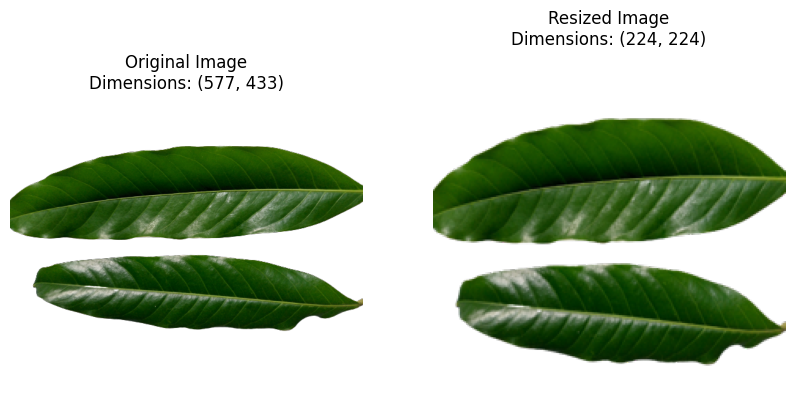

Resizing /content/merged_dataset_Date/Bohera/Bohera (23).png...
Resizing /content/merged_dataset_Date/Bohera/Bohera(24).png...
Resizing /content/merged_dataset_Date/Bohera/Bohera (199).png...
Resizing /content/merged_dataset_Date/Bohera/Bohera (195).png...
Resizing /content/merged_dataset_Date/Bohera/Bohera (120).png...
Resizing /content/merged_dataset_Date/Bohera/Bohera(50).png...
Resizing /content/merged_dataset_Date/Bohera/Bohera (10).png...
Resizing /content/merged_dataset_Date/Bohera/Bohera (75).png...
Resizing /content/merged_dataset_Date/Bohera/Bohera(8).png...
Resizing /content/merged_dataset_Date/Bohera/Bohera(18)_1.png...
Resizing /content/merged_dataset_Date/Bohera/Bohera (39).png...
Resizing /content/merged_dataset_Date/Bohera/Bohera (76).png...
Resizing /content/merged_dataset_Date/Bohera/Bohera(18).png...
Resizing /content/merged_dataset_Date/Bohera/Bohera (83).png...
Resizing /content/merged_dataset_Date/Bohera/Bohera(9).png...
Resizing /content/merged_dataset_Date/Boher

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

def resize_image(input_image_path, output_image_path, size=(224, 224)):
    original_image = Image.open(input_image_path)
    resized_image = original_image.resize(size)
    resized_image.save(output_image_path)

def resize_images_in_directory(input_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    resize_compare_flag = True
    for class_name in ['Bohera', 'Horitoki', 'Lemon grass', 'Nayon tara', 'Pathor kuchi', 'Aloevera', 'Henna Leaves', 'Indian Pennywort', 'Moringa', 'PaperMint', 'Tulshi']:
        input_folder = os.path.join(input_directory, class_name)
        output_folder = os.path.join(output_directory, class_name)
        os.makedirs(output_folder, exist_ok=True)

        for filename in os.listdir(input_folder):
            input_image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, filename)

            # Ensure the output directory exists
            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)

            # Check if the file is an image (simple filter)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                print(f"Resizing {input_image_path}...")
                resize_image(input_image_path, output_image_path)
                if resize_compare_flag:
                    compare_images(input_image_path, output_image_path)
                    resize_compare_flag = False

def compare_images(original_image_path, resized_image_path):
    original_image = Image.open(original_image_path)  # Keep in RGB
    resized_image = Image.open(resized_image_path)  # Keep in RGB
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original_image)  # Display in RGB
    ax[0].set_title(f'Original Image\nDimensions: {original_image.size}')
    ax[0].axis('off')
    ax[1].imshow(resized_image)  # Display in RGB
    ax[1].set_title(f'Resized Image\nDimensions: {resized_image.size}')
    ax[1].axis('off')
    plt.show()

# Specify the paths
input_directory = '/content/merged_dataset_Date'
output_directory = '/content/merged_dataset_resized2'

# Resize images in the specified directories
resize_images_in_directory(input_directory, output_directory)


Applying contrast stretching to /content/merged_dataset_resized2/Bohera/Bohera (135).png...


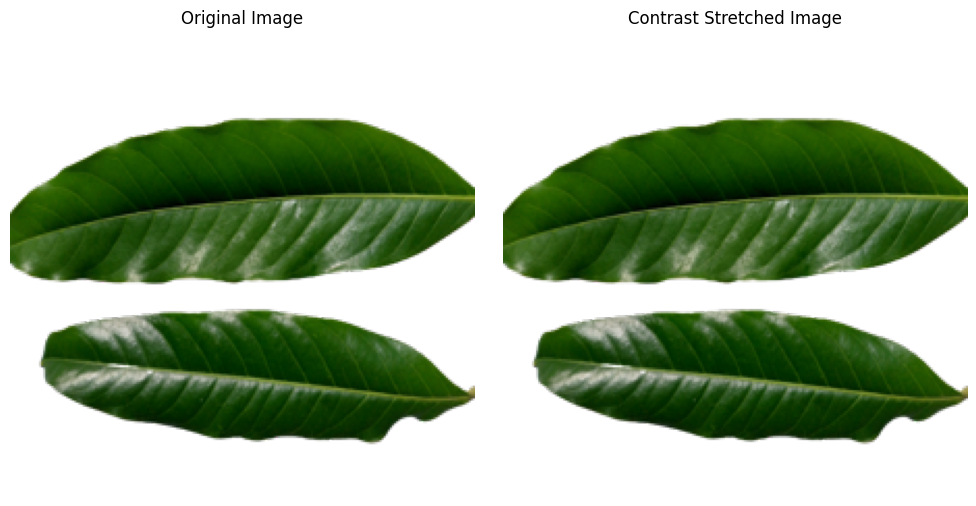

Applying contrast stretching to /content/merged_dataset_resized2/Bohera/Bohera (23).png...
Applying contrast stretching to /content/merged_dataset_resized2/Bohera/Bohera(24).png...
Applying contrast stretching to /content/merged_dataset_resized2/Bohera/Bohera (199).png...
Applying contrast stretching to /content/merged_dataset_resized2/Bohera/Bohera (195).png...
Applying contrast stretching to /content/merged_dataset_resized2/Bohera/Bohera (120).png...
Applying contrast stretching to /content/merged_dataset_resized2/Bohera/Bohera(50).png...
Applying contrast stretching to /content/merged_dataset_resized2/Bohera/Bohera (10).png...
Applying contrast stretching to /content/merged_dataset_resized2/Bohera/Bohera (75).png...
Applying contrast stretching to /content/merged_dataset_resized2/Bohera/Bohera(8).png...
Applying contrast stretching to /content/merged_dataset_resized2/Bohera/Bohera(18)_1.png...
Applying contrast stretching to /content/merged_dataset_resized2/Bohera/Bohera (39).png...

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

def contrast_stretching(image):
    # Convert image to numpy array
    img_array = np.array(image)

    # Normalize pixel values to the range [0, 1]
    img_normalized = img_array / 255.0

    # Compute min and max pixel values
    min_val = np.min(img_normalized)
    max_val = np.max(img_normalized)

    # Apply contrast stretching
    stretched_img = (img_normalized - min_val) / (max_val - min_val)

    # Convert back to uint8
    stretched_img = (255 * stretched_img).astype(np.uint8)

    # Convert numpy array back to image
    stretched_image = Image.fromarray(stretched_img)

    return stretched_image

def apply_contrast_stretching_and_compare(input_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    hist_compare_flag = True  # Flag to compare only the first image for demonstration
    for class_name in ['Bohera', 'Horitoki', 'Lemon grass', 'Nayon tara', 'Pathor kuchi', 'Aloevera', 'Henna Leaves', 'Indian Pennywort', 'Moringa', 'PaperMint', 'Tulshi']:
        input_folder = os.path.join(input_directory, class_name)
        output_folder = os.path.join(output_directory, class_name)
        os.makedirs(output_folder, exist_ok=True)

        for filename in os.listdir(input_folder):
            input_image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, filename)

            # Ensure the output directory exists
            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)

            # Check if the file is an image (simple filter)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                print(f"Applying contrast stretching to {input_image_path}...")
                original_image = Image.open(input_image_path)
                # Apply contrast stretching
                stretched_image = contrast_stretching(original_image)
                # Save the processed image
                stretched_image.save(output_image_path)

                if hist_compare_flag:  # Compare the first image
                    compare_images(original_image, stretched_image)
                    hist_compare_flag = False

def compare_images(original_image, stretched_image):
    # Display the original and stretched images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes = axes.ravel()

    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(stretched_image, cmap='gray')
    axes[1].set_title('Contrast Stretched Image')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

# Specify the directories
input_directory = '/content/merged_dataset_resized2'
output_directory = '/content/Data_contrast_stretched'

# Apply contrast stretching and compare
apply_contrast_stretching_and_compare(input_directory, output_directory)


Applying bilateral filtering to /content/Data_contrast_stretched/Bohera/Bohera (135).png...


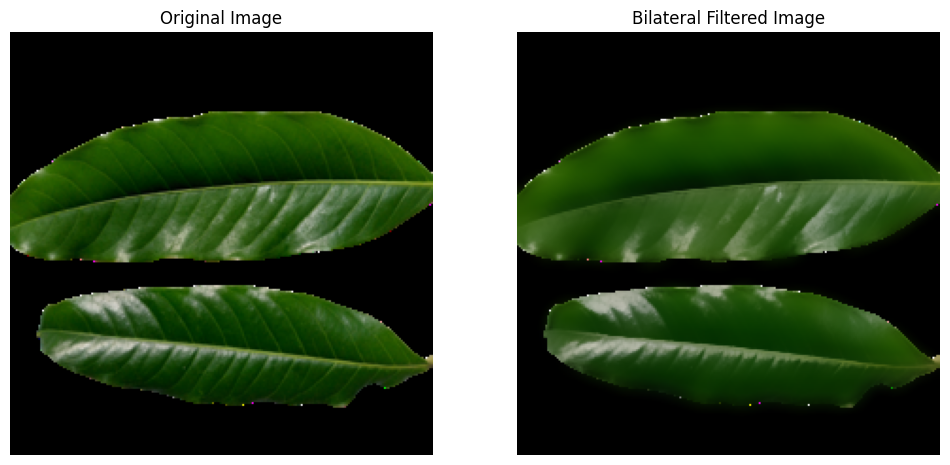

Applying bilateral filtering to /content/Data_contrast_stretched/Bohera/Bohera (23).png...
Applying bilateral filtering to /content/Data_contrast_stretched/Bohera/Bohera(24).png...
Applying bilateral filtering to /content/Data_contrast_stretched/Bohera/Bohera (199).png...
Applying bilateral filtering to /content/Data_contrast_stretched/Bohera/Bohera (195).png...
Applying bilateral filtering to /content/Data_contrast_stretched/Bohera/Bohera (120).png...
Applying bilateral filtering to /content/Data_contrast_stretched/Bohera/Bohera(50).png...
Applying bilateral filtering to /content/Data_contrast_stretched/Bohera/Bohera (10).png...
Applying bilateral filtering to /content/Data_contrast_stretched/Bohera/Bohera (75).png...
Applying bilateral filtering to /content/Data_contrast_stretched/Bohera/Bohera(8).png...
Applying bilateral filtering to /content/Data_contrast_stretched/Bohera/Bohera(18)_1.png...
Applying bilateral filtering to /content/Data_contrast_stretched/Bohera/Bohera (39).png...

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

def apply_bilateral_filtering_and_compare(input_directory, output_directory, d=15, sigmaColor=75, sigmaSpace=75):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    bilateral_compare_flag = True  # Flag to compare only the first image for demonstration
    for class_name in ['Bohera', 'Horitoki', 'Lemon grass', 'Nayon tara', 'Pathor kuchi', 'Aloevera', 'Henna Leaves', 'Indian Pennywort', 'Moringa', 'PaperMint', 'Tulshi']:
        input_folder = os.path.join(input_directory, class_name)
        output_folder = os.path.join(output_directory, class_name)
        os.makedirs(output_folder, exist_ok=True)

        for filename in os.listdir(input_folder):
            input_image_path = os.path.join(input_folder, filename)
            output_image_path = os.path.join(output_folder, filename)

            # Ensure the output directory exists
            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)

            # Check if the file is an image (simple filter)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                print(f"Applying bilateral filtering to {input_image_path}...")
                # Read the image using OpenCV
                image = cv2.imread(input_image_path)
                # Convert BGR image to RGB
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                # Apply bilateral filter
                filtered_image = cv2.bilateralFilter(image_rgb, d=d, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace)
                # Save the filtered image
                filtered_image_bgr = cv2.cvtColor(filtered_image, cv2.COLOR_RGB2BGR)
                cv2.imwrite(output_image_path, filtered_image_bgr)

                if bilateral_compare_flag:  # Compare the first image
                    compare_images(image_rgb, filtered_image)
                    bilateral_compare_flag = False

def compare_images(original_image, filtered_image):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(original_image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(filtered_image)
    ax[1].set_title('Bilateral Filtered Image')
    ax[1].axis('off')

    plt.show()

# Specify the directories
input_directory = '/content/Data_contrast_stretched'
output_directory = '/content/Data_bilateral_filtered'

# Apply bilateral filtering and compare
apply_bilateral_filtering_and_compare(input_directory, output_directory)


/usr/local/lib/python3.10/dist-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


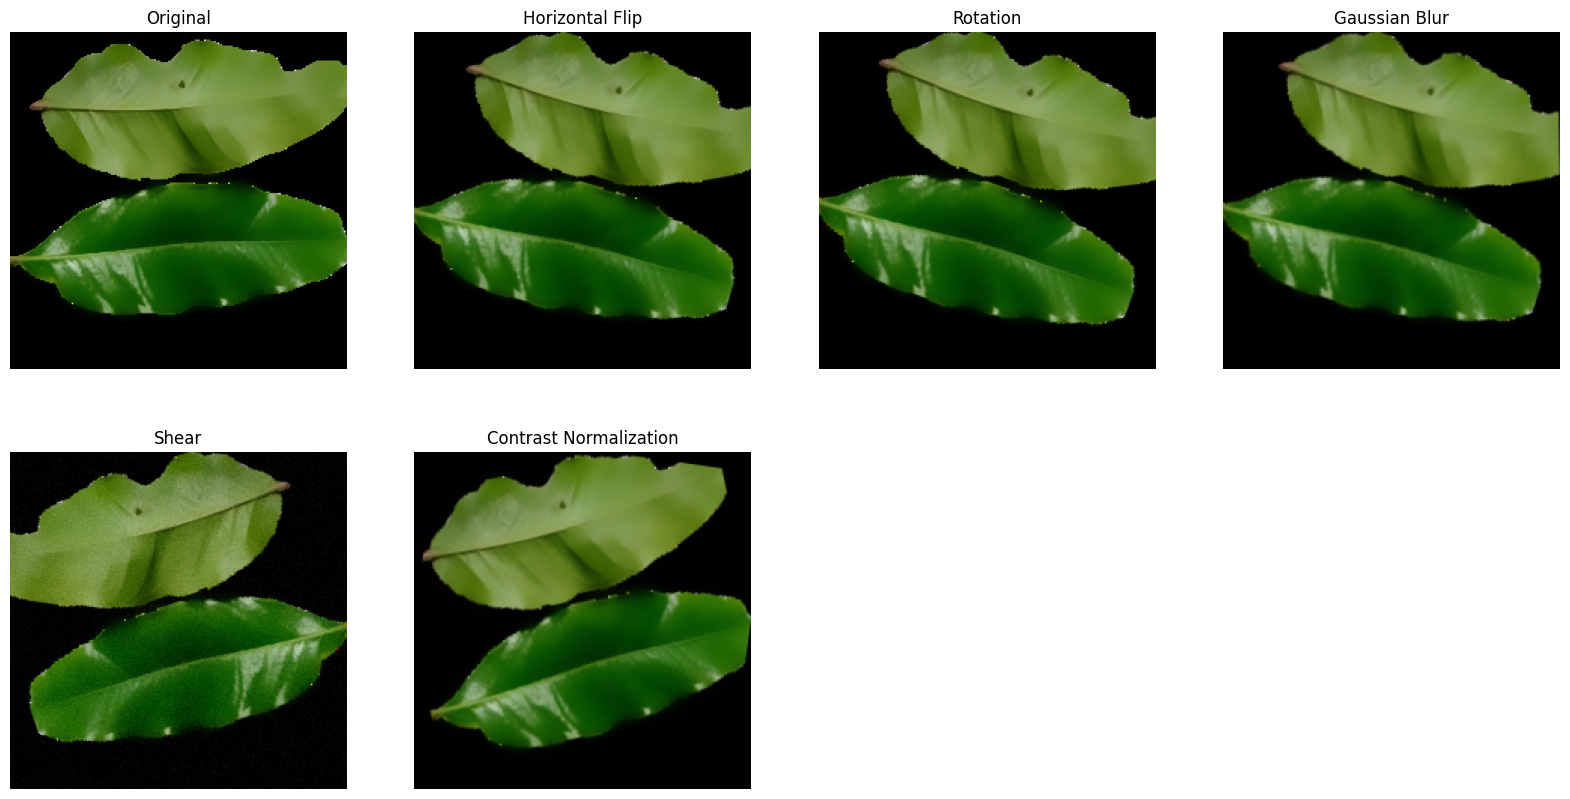

In [ ]:
import imgaug.augmenters as iaa
from skimage import io
import matplotlib.pyplot as plt
import os
import random

def visualize_augmentation(image_path, augmentation_pipeline):
    # Load the image
    image = io.imread(image_path)

    # Apply augmentation
    augmented_images = [augmentation_pipeline(image=image) for _ in range(5)]  # Augment the image 5 times

    # Define augmentation labels
    augmentation_labels = [
        'Original',
        'Horizontal Flip',
        'Rotation',
        'Gaussian Blur',
        'Shear',
        'Contrast Normalization',
        'Gaussian Noise'
    ]

    # Display the original and augmented images for each augmentation feature
    plt.figure(figsize=(20, 10))
    num_images = len(augmented_images) + 1
    for idx in range(num_images):
        plt.subplot(2, 4, idx + 1)
        if idx == 0:
            plt.imshow(image)
            plt.title(augmentation_labels[0])
        else:
            plt.imshow(augmented_images[idx - 1])
            plt.title(augmentation_labels[idx])
        plt.axis('off')

    plt.show()

# Define your augmentation pipeline
augmentation_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontal flips
    iaa.Affine(rotate=(-25, 25)),  # Rotation
    iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.2))),  # Gaussian blur
    iaa.Sometimes(0.5, iaa.Affine(shear=(-8, 8))),  # Shear
    iaa.Sometimes(0.5, iaa.ContrastNormalization((0.8, 1.2))),  # Contrast normalization
    iaa.Sometimes(0.5, iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))),  # Gaussian noise
], random_order=True)  # Apply augmentations in random order

# Specify the directory containing the images
image_directory = '/content/Data_bilateral_filtered/Bohera'

# Get the list of images in the directory
image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# Choose a random image from the directory
random_image = random.choice(image_files)

# Specify the path to the random image
image_path = os.path.join(image_directory, random_image)

# Visualize augmentation for the random image
visualize_augmentation(image_path, augmentation_pipeline)

In [ ]:
import imgaug.augmenters as iaa
from skimage import io
import os

def augment_images(input_directory, output_directory, augmentation_pipeline, num_images_per_class=600):
    for class_name in os.listdir(input_directory):
        class_folder = os.path.join(input_directory, class_name)

        if not os.path.isdir(class_folder):
            continue

        output_class_directory = os.path.join(output_directory, class_name)
        os.makedirs(output_class_directory, exist_ok=True)

        # Load all images in the class folder
        images = []
        for file in os.listdir(class_folder):
            input_image_path = os.path.join(class_folder, file)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                image = io.imread(input_image_path)
                images.append(image)

        # Augment images in the class folder until reaching the desired number of images per class
        augmented_count = 0
        while augmented_count < num_images_per_class:
            for image in images:
                image_aug = augmentation_pipeline(image=image)
                augmented_filename = f"{class_name}_{augmented_count + 1}.png"
                io.imsave(os.path.join(output_class_directory, augmented_filename), image_aug)
                augmented_count += 1
                if augmented_count >= num_images_per_class:
                    break

# Define your augmentation pipeline
augmentation_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontal flips
    iaa.Affine(rotate=(-25, 25)),  # Rotation
    iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.2))),  # Gaussian blur
    iaa.Sometimes(0.5, iaa.Affine(shear=(-8, 8))),  # Shear
    iaa.Sometimes(0.5, iaa.LinearContrast((0.8, 1.2))),  # Contrast normalization
    iaa.Sometimes(0.5, iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))),  # Gaussian noise
], random_order=True)  # Apply augmentations in random order

# Specify the directories
input_directory = '/content/Data_bilateral_filtered'  # Replace with your actual input directory
output_directory = '/content/Final_augmented_images'  # Replace with your preferred output directory

# Augment images
augment_images(input_directory, output_directory, augmentation_pipeline)


In [ ]:
import os
import pandas as pd

input_directory = '/content/merged_dataset_Date'  # Update with your actual path
augmented_directory = '/content/Final_augmented_images'  # Update with your actual path where augmented images are saved

def count_images_in_directory(directory):
    counts = {}
    for root, dirs, files in os.walk(directory):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            count = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))])
            counts[dir_name] = count
    return counts

# Count original and augmented images
original_counts = count_images_in_directory(input_directory)
augmented_counts = count_images_in_directory(augmented_directory)

# Create a DataFrame
df = pd.DataFrame(list(original_counts.items()), columns=['Class', 'Original Count'])
df['Augmented Count'] = df['Class'].map(augmented_counts)

# Display the DataFrame
df


Class  Original Count  Augmented Count
0        Lemon grass             300              600
1             Tulshi             119              600
2       Pathor kuchi             300              600
3         Nayon tara             300              600
4            Moringa             144              600
5       Henna Leaves             112              600
6           Aloevera             175              600
7           Horitoki             300              600
8   Indian Pennywort             104              600
9          PaperMint             131              600
10            Bohera             300              600

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


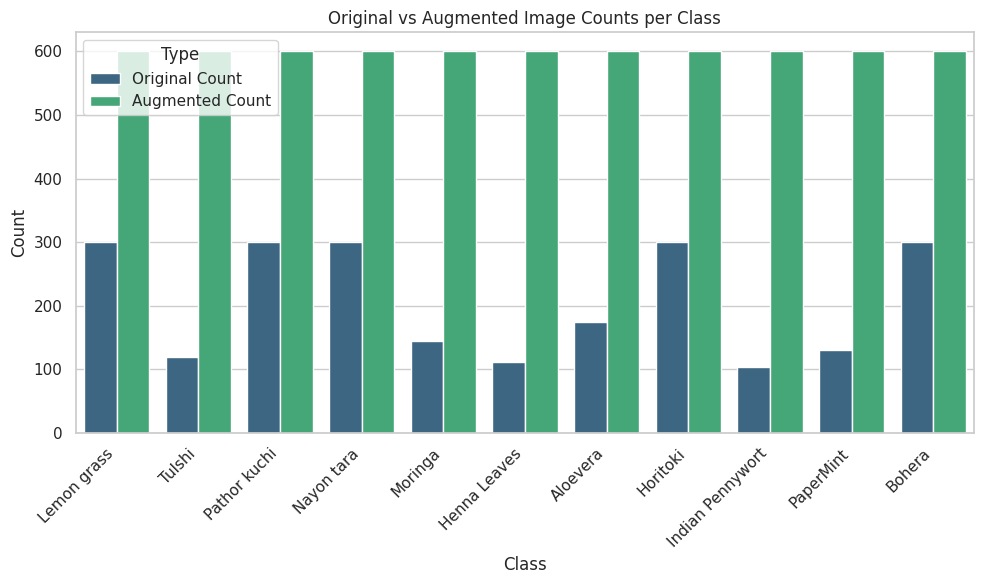

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that seaborn is styled to have a more appealing look
sns.set(style="whitegrid")

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plot the 'Original Count' and 'Augmented Count' for each class
# Use a different color for each by specifying the 'palette' parameter
sns.barplot(data=df.melt(id_vars='Class', value_vars=['Original Count', 'Augmented Count'], var_name='Type', value_name='Count'),
            x='Class', y='Count', hue='Type', palette='viridis')

# Add some helpful UI components
plt.xticks(rotation=45, ha='right')  # Rotate class labels for better readability
plt.xlabel('Class')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.title('Original vs Augmented Image Counts per Class')  # Title of the plot

# Display the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import mean_squared_error
from IPython.display import display, HTML

def resize_image(image, size=(224, 224)):
    return cv2.resize(image, size)

def get_random_10_images_by_class(directory):
    all_images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith((".png", ".jpg", ".jpeg")):
                all_images.append(os.path.join(root, file))

    selected_images = np.random.choice(all_images, size=min(10, len(all_images)), replace=False)
    images_by_class = {}
    for img_path in selected_images:
        class_name = os.path.basename(os.path.dirname(img_path))
        if class_name not in images_by_class:
            images_by_class[class_name] = []
        images_by_class[class_name].append(img_path)
    return images_by_class

def calculate_metrics(imageA, imageB):
    if imageA is None or imageB is None:
        return None, None, None, None

    common_size = (224, 224)
    imageA_resized = resize_image(imageA, common_size)
    imageB_resized = resize_image(imageB, common_size)

    grayA = cv2.cvtColor(imageA_resized, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB_resized, cv2.COLOR_BGR2GRAY)

    ssim_value = compare_ssim(grayA, grayB)
    psnr_value = compare_psnr(grayA, grayB)
    mse_value = mean_squared_error(grayA, grayB)
    rmse_value = np.sqrt(mse_value)

    return ssim_value, psnr_value, mse_value, rmse_value

directory = '/content/Final_augmented_images'  # Update with your actual dataset directory
class_images = get_random_10_images_by_class(directory)

data = []
for class_name, images in class_images.items():
    reference_image = cv2.imread(images[0])  # Using the first image as a reference
    for img_path in images:
        img = cv2.imread(img_path)
        if img is not None:
            ssim, psnr, mse, rmse = calculate_metrics(reference_image, img)
            data.append({
                "Class": class_name,
                "Image File Name": os.path.basename(img_path),
                "SSIM": ssim,
                "PSNR": psnr,
                "MSE": mse,
                "RMSE": rmse
            })

df = pd.DataFrame(data)

def simple_styled_table(df):
    return (df.style
            .set_table_styles([
                {'selector': 'th',
                 'props': [('background-color', '#4C72B0'),
                           ('color', 'white'),
                           ('border', '1px solid black')]},
                {'selector': 'td',
                 'props': [('border', '1px solid gray'),
                           ('color', 'black')]},
                {'selector': 'tr:nth-of-type(odd)',
                 'props': [('background', '#f2f2f2')]},
                {'selector': 'tr:nth-of-type(even)',
                 'props': [('background', 'white')]},
            ], overwrite=False)
            .format("{:.2f}", subset=pd.IndexSlice[:, ['SSIM', 'PSNR', 'MSE', 'RMSE']])
           )

# Apply the styling function
styled_df = simple_styled_table(df)

styled_df


/usr/local/lib/python3.10/dist-packages/skimage/metrics/simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)


In [ ]:
import os
import shutil
import random
from tqdm import tqdm

def split_dataset(source_dir, train_dir, test_dir, val_dir, split_ratio=(0.8, 0.1, 0.1)):
    for class_name in os.listdir(source_dir):
        class_dir = os.path.join(source_dir, class_name)
        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)

        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

        files = os.listdir(class_dir)
        random.shuffle(files)

        num_files = len(files)
        train_split = int(num_files * split_ratio[0])
        test_split = int(num_files * split_ratio[1])

        train_files = files[:train_split]
        test_files = files[train_split:train_split + test_split]
        val_files = files[train_split + test_split:]

        for file in tqdm(train_files, desc=f"Copying {class_name} train files"):
            shutil.copy(os.path.join(class_dir, file), os.path.join(train_class_dir, file))

        for file in tqdm(test_files, desc=f"Copying {class_name} test files"):
            shutil.copy(os.path.join(class_dir, file), os.path.join(test_class_dir, file))

        for file in tqdm(val_files, desc=f"Copying {class_name} validation files"):
            shutil.copy(os.path.join(class_dir, file), os.path.join(val_class_dir, file))

# Define paths
source_dir = "/content/Final_augmented_images"
train_dir = "/content/train"
test_dir = "/content/test"
val_dir = "/content/validation"

# Split dataset
split_dataset(source_dir, train_dir, test_dir, val_dir)


Copying Bohera validation files: 100%|██████████| 60/60 [00:00<00:00, 6211.94it/s]


**MobileNetV2**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths for your dataset
train_path = '/content/train'
test_path = '/content/test'
val_path = '/content/validation'
modelsave_path = "/content/MobileNetV2_model.keras"

# Load and preprocess data using ImageDataGenerator
batch_size = 64  # Set your desired batch size
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)

# Import MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build a custom classification model on top of MobileNetV2
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))  # Add Dropout layer with 50% rate
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Add Dropout layer with 50% rate
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Freeze the pretrained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
checkpoint = ModelCheckpoint(modelsave_path, monitor='val_accuracy', save_best_only=True, mode='max')
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=val_generator, validation_steps=val_generator.samples // batch_size,
                    epochs=30, callbacks=[checkpoint])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Accuracy:", test_acc)

# Save the final model
model.save(modelsave_path)

Found 5280 images belonging to 11 classes.
Found 660 images belonging to 11 classes.
Found 660 images belonging to 11 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 43s 332ms/step - accuracy: 0.6845 - loss: 0.9704 - val_accuracy: 0.9734 - val_loss: 0.0786
Epoch 2/30
 1/82 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9375 - loss: 0.1804

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9375 - loss: 0.1804 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 58s 211ms/step - accuracy: 0.9532 - loss: 0.1345 - val_accuracy: 0.9844 - val_loss: 0.0417
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9531 - loss: 0.1236 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.9819 - loss: 0.0535 - val_accuracy: 0.9859 - val_loss: 0.0300
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.9688 - loss: 0.0786 - val_accuracy: 0.9500 - val_loss: 0.1116
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - accuracy: 0.9817 - loss: 0.0506 - val_accuracy: 0.9891 - val_loss: 0.0345
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.9531 - loss: 0.1472 - val_accuracy: 0.9500 - val_loss: 0.2805
Epoch 9/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 18s 201ms/step - accuracy: 0.9851 - loss: 0.0484 - val_accuracy: 0.9922 - val

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 387ms/step


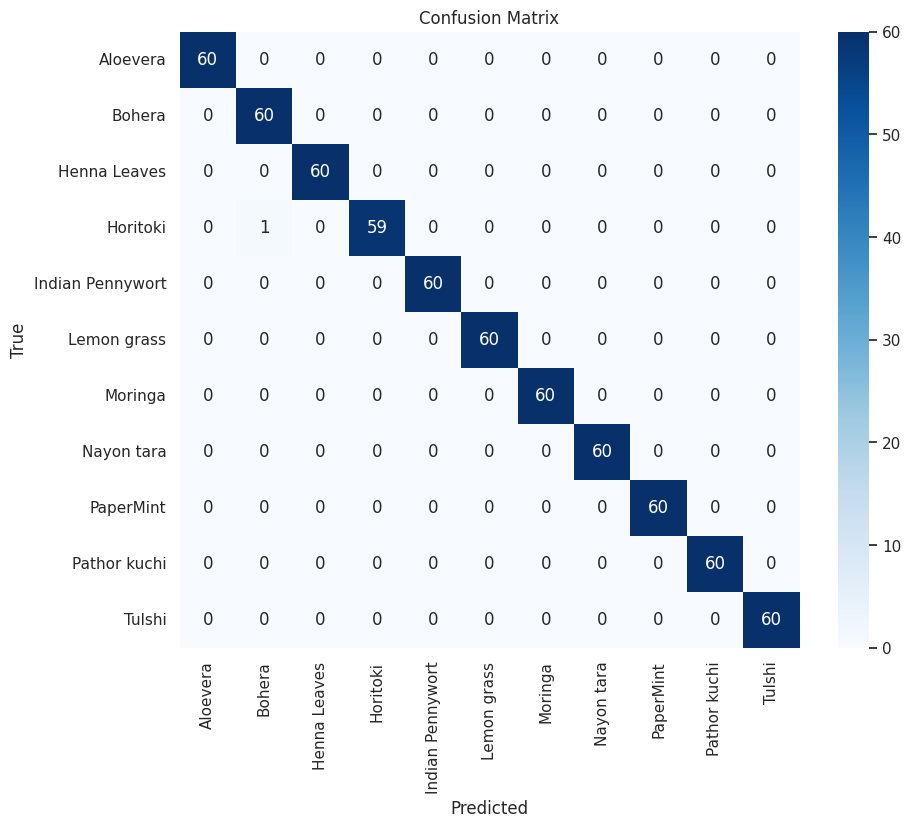

Classification Report
                  precision    recall  f1-score   support

        Aloevera       1.00      1.00      1.00        60
          Bohera       0.98      1.00      0.99        60
    Henna Leaves       1.00      1.00      1.00        60
        Horitoki       1.00      0.98      0.99        60
Indian Pennywort       1.00      1.00      1.00        60
     Lemon grass       1.00      1.00      1.00        60
         Moringa       1.00      1.00      1.00        60
      Nayon tara       1.00      1.00      1.00        60
       PaperMint       1.00      1.00      1.00        60
    Pathor kuchi       1.00      1.00      1.00        60
          Tulshi       1.00      1.00      1.00        60

        accuracy                           1.00       660
       macro avg       1.00      1.00      1.00       660
    weighted avg       1.00      1.00      1.00       660



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the labels of the test data
Y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred[:test_generator.samples])
cm_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred[:test_generator.samples], target_names=cm_labels))

In [ ]:
# Calculate and print class-wise accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)
for i, label in enumerate(cm_labels):
    print(f'Accuracy for class {label}: {class_accuracies[i] * 100:.2f}%')

Accuracy for class Aloevera: 100.00%
Accuracy for class Bohera: 100.00%
Accuracy for class Henna Leaves: 100.00%
Accuracy for class Horitoki: 98.33%
Accuracy for class Indian Pennywort: 100.00%
Accuracy for class Lemon grass: 100.00%
Accuracy for class Moringa: 100.00%
Accuracy for class Nayon tara: 100.00%
Accuracy for class PaperMint: 100.00%
Accuracy for class Pathor kuchi: 100.00%
Accuracy for class Tulshi: 100.00%


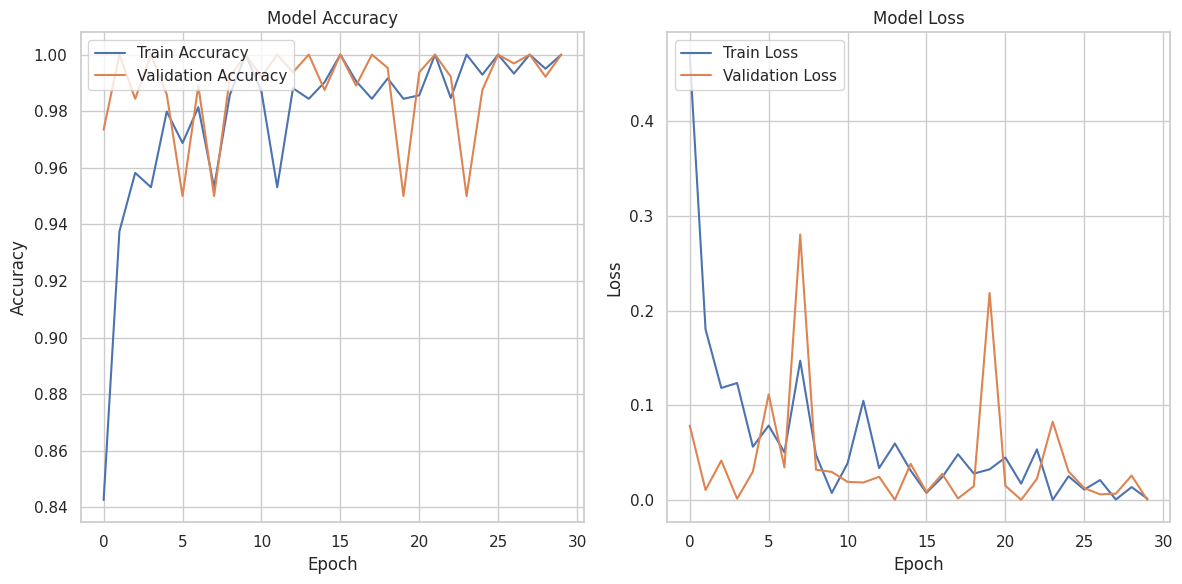

In [ ]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

**DenseNet201**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths for your dataset
train_path = '/content/train'
test_path = '/content/test'
val_path = '/content/validation'
modelsave_path = "/content/DenseNet201_model.keras"

# Load and preprocess data using ImageDataGenerator
batch_size = 64  # Set your desired batch size
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)

# Import DenseNet201 model
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build a custom classification model on top of DenseNet201
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))  # Add Dropout layer with 50% rate
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Add Dropout layer with 50% rate
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Freeze the pretrained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
checkpoint = ModelCheckpoint(modelsave_path, monitor='val_accuracy', save_best_only=True, mode='max')
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=val_generator, validation_steps=val_generator.samples // batch_size,
                    epochs=30, callbacks=[checkpoint])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Accuracy:", test_acc)

# Save the final model
model.save(modelsave_path)

Found 5280 images belonging to 11 classes.
Found 660 images belonging to 11 classes.
Found 660 images belonging to 11 classes.
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 126s 789ms/step - accuracy: 0.6304 - loss: 1.1319 - val_accuracy: 0.9812 - val_loss: 0.0711
Epoch 2/30
 1/82 ━━━━━━━━━━━━━━━━━━━━ 21s 264ms/step - accuracy: 0.9531 - loss: 0.1164

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


82/82 ━━━━━━━━━━━━━━━━━━━━ 19s 234ms/step - accuracy: 0.9531 - loss: 0.1164 - val_accuracy: 1.0000 - val_loss: 0.0450
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 25s 277ms/step - accuracy: 0.9693 - loss: 0.0946 - val_accuracy: 0.9859 - val_loss: 0.0495
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9844 - loss: 0.0676 - val_accuracy: 1.0000 - val_loss: 0.0523
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 39s 269ms/step - accuracy: 0.9858 - loss: 0.0524 - val_accuracy: 0.9891 - val_loss: 0.0395
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9844 - loss: 0.1012 - val_accuracy: 1.0000 - val_loss: 0.0397
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 40s 286ms/step - accuracy: 0.9802 - loss: 0.0568 - val_accuracy: 0.9937 - val_loss: 0.0243
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9844 - loss: 0.0325 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 9/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 24s 279ms/step - accuracy: 0.9864 - loss: 0.0354 - val_accuracy: 0.9969 - val_

11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step


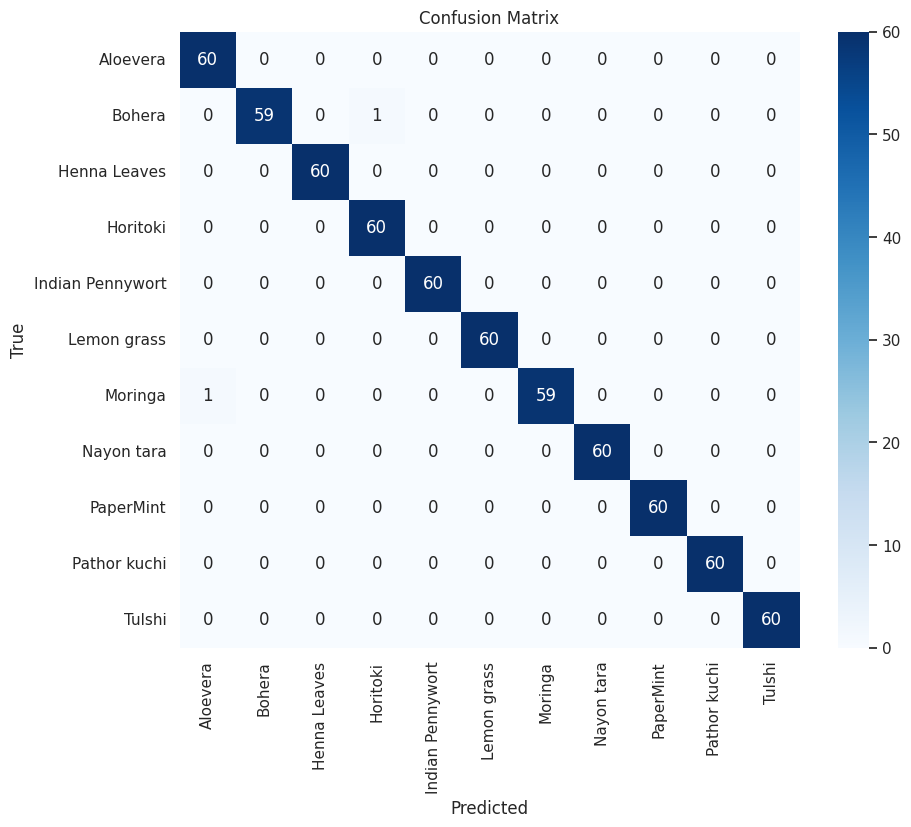

Classification Report
                  precision    recall  f1-score   support

        Aloevera       0.98      1.00      0.99        60
          Bohera       1.00      0.98      0.99        60
    Henna Leaves       1.00      1.00      1.00        60
        Horitoki       0.98      1.00      0.99        60
Indian Pennywort       1.00      1.00      1.00        60
     Lemon grass       1.00      1.00      1.00        60
         Moringa       1.00      0.98      0.99        60
      Nayon tara       1.00      1.00      1.00        60
       PaperMint       1.00      1.00      1.00        60
    Pathor kuchi       1.00      1.00      1.00        60
          Tulshi       1.00      1.00      1.00        60

        accuracy                           1.00       660
       macro avg       1.00      1.00      1.00       660
    weighted avg       1.00      1.00      1.00       660



In [ ]:
# Predict the labels of the test data
Y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred[:test_generator.samples])
cm_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred[:test_generator.samples], target_names=cm_labels))

In [ ]:
# Calculate and print class-wise accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)
for i, label in enumerate(cm_labels):
    print(f'Accuracy for class {label}: {class_accuracies[i] * 100:.2f}%')

Accuracy for class Aloevera: 100.00%
Accuracy for class Bohera: 98.33%
Accuracy for class Henna Leaves: 100.00%
Accuracy for class Horitoki: 100.00%
Accuracy for class Indian Pennywort: 100.00%
Accuracy for class Lemon grass: 100.00%
Accuracy for class Moringa: 98.33%
Accuracy for class Nayon tara: 100.00%
Accuracy for class PaperMint: 100.00%
Accuracy for class Pathor kuchi: 100.00%
Accuracy for class Tulshi: 100.00%


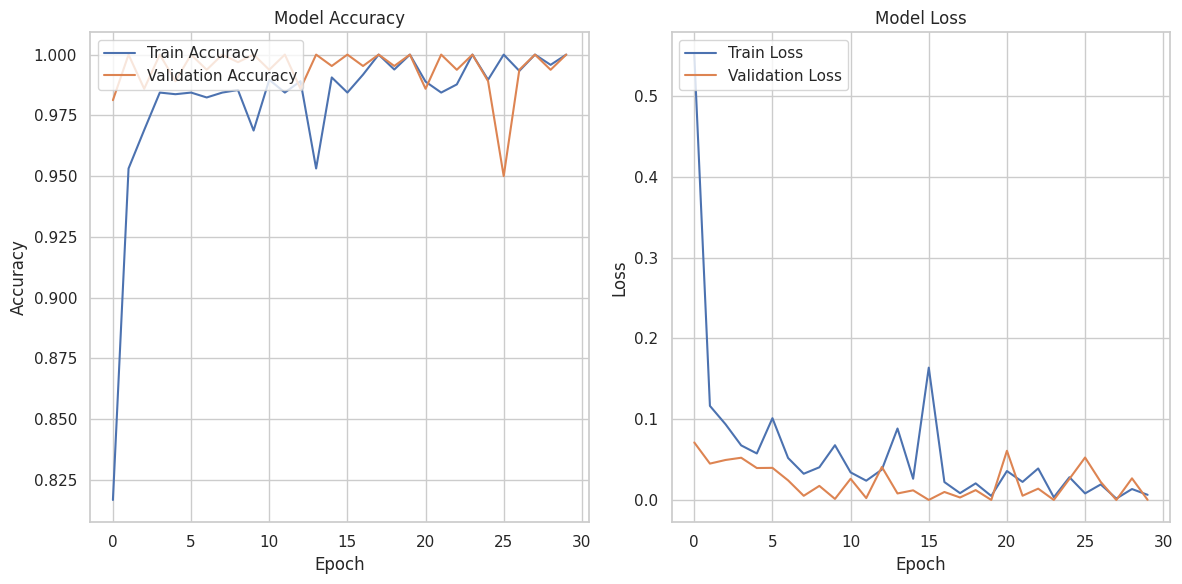

In [ ]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

**GoogLeNet**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths for your dataset
train_path = '/content/train'
test_path = '/content/test'
val_path = '/content/validation'
modelsave_path = "/content/InceptionV3_model.keras"

# Load and preprocess data using ImageDataGenerator
batch_size = 64  # Set your desired batch size
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(299, 299), batch_size=batch_size, class_mode='categorical', shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(299, 299), batch_size=batch_size, class_mode='categorical', shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path, target_size=(299, 299), batch_size=batch_size, class_mode='categorical', shuffle=True)

# Import InceptionV3 model (GoogleNet variant)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Build a custom classification model on top of InceptionV3
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))  # Add Dropout layer with 50% rate
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))  # Add Dropout layer with 50% rate
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Freeze the pretrained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
checkpoint = ModelCheckpoint(modelsave_path, monitor='val_accuracy', save_best_only=True, mode='max')
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=val_generator, validation_steps=val_generator.samples // batch_size,
                    epochs=30, callbacks=[checkpoint])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Accuracy:", test_acc)

# Save the final model
model.save(modelsave_path)


Found 5280 images belonging to 11 classes.
Found 660 images belonging to 11 classes.
Found 660 images belonging to 11 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 80s 610ms/step - accuracy: 0.7007 - loss: 0.8973 - val_accuracy: 0.9578 - val_loss: 0.1238
Epoch 2/30
 1/82 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - accuracy: 0.9531 - loss: 0.1935

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.9531 - loss: 0.1935 - val_accuracy: 0.9000 - val_loss: 0.2799
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 344ms/step - accuracy: 0.9647 - loss: 0.1103 - val_accuracy: 0.9750 - val_loss: 0.0707
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 1.0000 - loss: 0.0208 - val_accuracy: 1.0000 - val_loss: 0.0117
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 29s 322ms/step - accuracy: 0.9815 - loss: 0.0589 - val_accuracy: 0.9688 - val_loss: 0.0845
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0251 - val_accuracy: 1.0000 - val_loss: 0.0104
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 28s 322ms/step - accuracy: 0.9786 - loss: 0.0614 - val_accuracy: 0.9891 - val_loss: 0.0399
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0180 - val_accuracy: 0.9500 - val_loss: 0.0940
Epoch 9/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - accuracy: 0.9917 - loss: 0.0264 - val_accuracy: 0.9875 - val_

11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 880ms/step


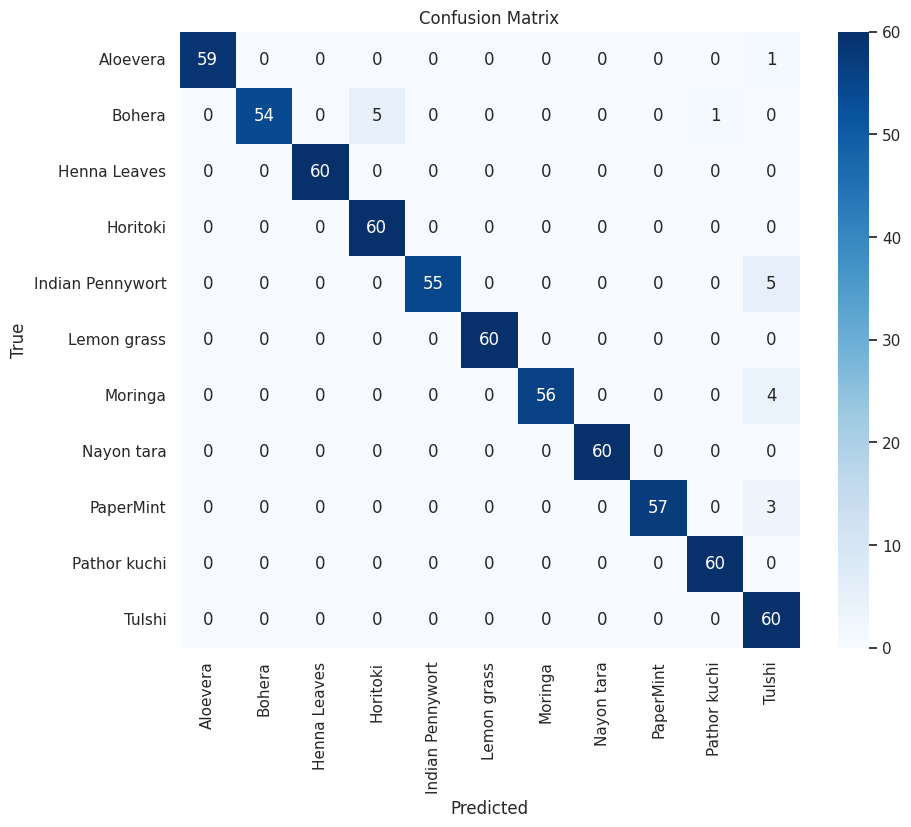

Classification Report
                  precision    recall  f1-score   support

        Aloevera       1.00      0.98      0.99        60
          Bohera       1.00      0.90      0.95        60
    Henna Leaves       1.00      1.00      1.00        60
        Horitoki       0.92      1.00      0.96        60
Indian Pennywort       1.00      0.92      0.96        60
     Lemon grass       1.00      1.00      1.00        60
         Moringa       1.00      0.93      0.97        60
      Nayon tara       1.00      1.00      1.00        60
       PaperMint       1.00      0.95      0.97        60
    Pathor kuchi       0.98      1.00      0.99        60
          Tulshi       0.82      1.00      0.90        60

        accuracy                           0.97       660
       macro avg       0.98      0.97      0.97       660
    weighted avg       0.98      0.97      0.97       660



In [ ]:
# Predict the labels of the test data
Y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred[:test_generator.samples])
cm_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred[:test_generator.samples], target_names=cm_labels))

In [ ]:
# Calculate and print class-wise accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)
for i, label in enumerate(cm_labels):
    print(f'Accuracy for class {label}: {class_accuracies[i] * 100:.2f}%')

Accuracy for class Aloevera: 98.33%
Accuracy for class Bohera: 90.00%
Accuracy for class Henna Leaves: 100.00%
Accuracy for class Horitoki: 100.00%
Accuracy for class Indian Pennywort: 91.67%
Accuracy for class Lemon grass: 100.00%
Accuracy for class Moringa: 93.33%
Accuracy for class Nayon tara: 100.00%
Accuracy for class PaperMint: 95.00%
Accuracy for class Pathor kuchi: 100.00%
Accuracy for class Tulshi: 100.00%


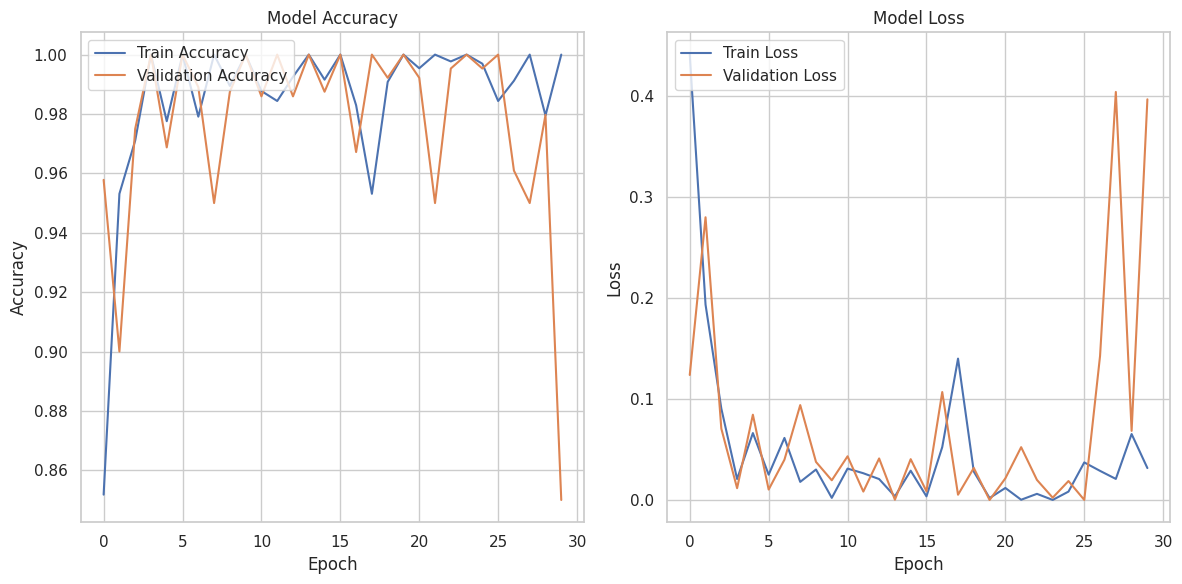

In [ ]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

**AlexNet**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths for your dataset
train_path = '/content/train'
test_path = '/content/test'
val_path = '/content/validation'
modelsave_path = "/content/AlexNet_model.keras"

# Load and preprocess data using ImageDataGenerator
batch_size = 64  # Set your desired batch size
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(227, 227), batch_size=batch_size, class_mode='categorical', shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(227, 227), batch_size=batch_size, class_mode='categorical', shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path, target_size=(227, 227), batch_size=batch_size, class_mode='categorical', shuffle=True)

# Build AlexNet model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Flattening
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.2))

# 2nd Fully Connected Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model Checkpoint
checkpoint = ModelCheckpoint(modelsave_path, monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=val_generator, validation_steps=val_generator.samples // batch_size,
                    epochs=30, callbacks=[checkpoint])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Accuracy:", test_acc)

# Save the final model
model.save(modelsave_path)


Found 5280 images belonging to 11 classes.
Found 660 images belonging to 11 classes.
Found 660 images belonging to 11 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 58s 558ms/step - accuracy: 0.1747 - loss: 2.6574 - val_accuracy: 0.4328 - val_loss: 1.2605
Epoch 2/30
 1/82 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.3906 - loss: 1.3411

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


82/82 ━━━━━━━━━━━━━━━━━━━━ 23s 286ms/step - accuracy: 0.3906 - loss: 1.3411 - val_accuracy: 0.5500 - val_loss: 0.8870
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 54s 612ms/step - accuracy: 0.5427 - loss: 1.1020 - val_accuracy: 0.7250 - val_loss: 0.7428
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 26s 319ms/step - accuracy: 0.6875 - loss: 0.7459 - val_accuracy: 0.7500 - val_loss: 0.8459
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 43s 518ms/step - accuracy: 0.7179 - loss: 0.7328 - val_accuracy: 0.7750 - val_loss: 0.5994
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 40s 496ms/step - accuracy: 0.7031 - loss: 0.6882 - val_accuracy: 0.9000 - val_loss: 0.3959
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 77s 214ms/step - accuracy: 0.8397 - loss: 0.4257 - val_accuracy: 0.8578 - val_loss: 0.3465
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 22s 267ms/step - accuracy: 0.9375 - loss: 0.2384 - val_accuracy: 0.9500 - val_loss: 0.3255
Epoch 9/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - accuracy: 0.8781 - loss: 0.3248 - val_accuracy: 0.865

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step


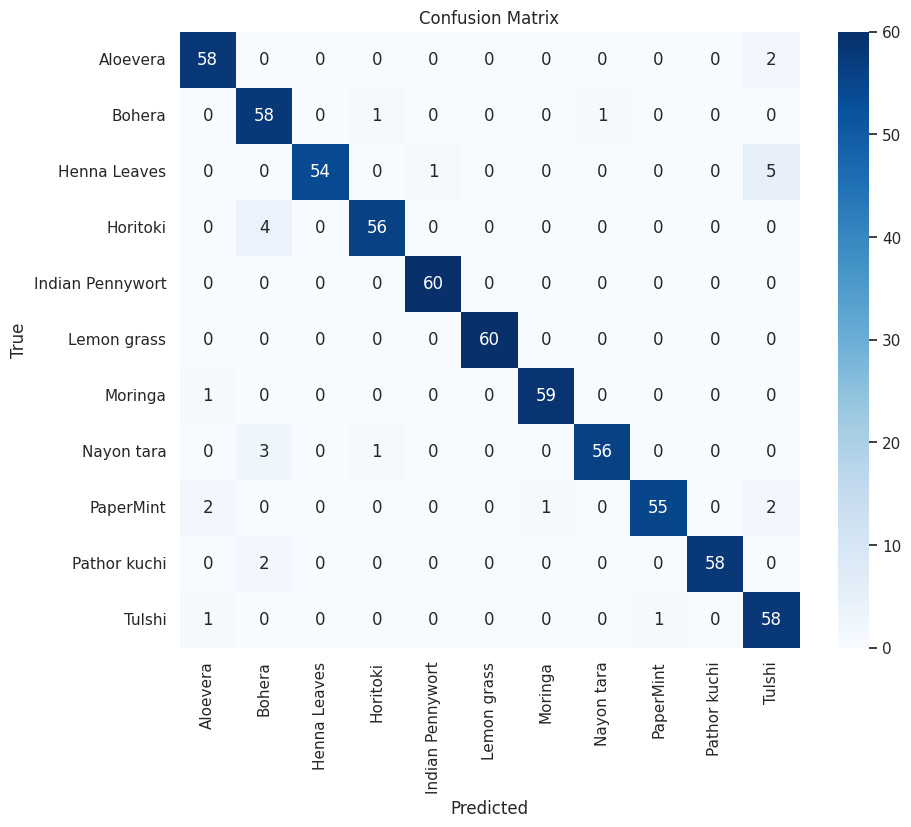

Classification Report
                  precision    recall  f1-score   support

        Aloevera       0.94      0.97      0.95        60
          Bohera       0.87      0.97      0.91        60
    Henna Leaves       1.00      0.90      0.95        60
        Horitoki       0.97      0.93      0.95        60
Indian Pennywort       0.98      1.00      0.99        60
     Lemon grass       1.00      1.00      1.00        60
         Moringa       0.98      0.98      0.98        60
      Nayon tara       0.98      0.93      0.96        60
       PaperMint       0.98      0.92      0.95        60
    Pathor kuchi       1.00      0.97      0.98        60
          Tulshi       0.87      0.97      0.91        60

        accuracy                           0.96       660
       macro avg       0.96      0.96      0.96       660
    weighted avg       0.96      0.96      0.96       660



In [ ]:
# Predict the labels of the test data
Y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred[:test_generator.samples])
cm_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred[:test_generator.samples], target_names=cm_labels))

In [ ]:
# Calculate and print class-wise accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)
for i, label in enumerate(cm_labels):
    print(f'Accuracy for class {label}: {class_accuracies[i] * 100:.2f}%')

Accuracy for class Aloevera: 96.67%
Accuracy for class Bohera: 96.67%
Accuracy for class Henna Leaves: 90.00%
Accuracy for class Horitoki: 93.33%
Accuracy for class Indian Pennywort: 100.00%
Accuracy for class Lemon grass: 100.00%
Accuracy for class Moringa: 98.33%
Accuracy for class Nayon tara: 93.33%
Accuracy for class PaperMint: 91.67%
Accuracy for class Pathor kuchi: 96.67%
Accuracy for class Tulshi: 96.67%


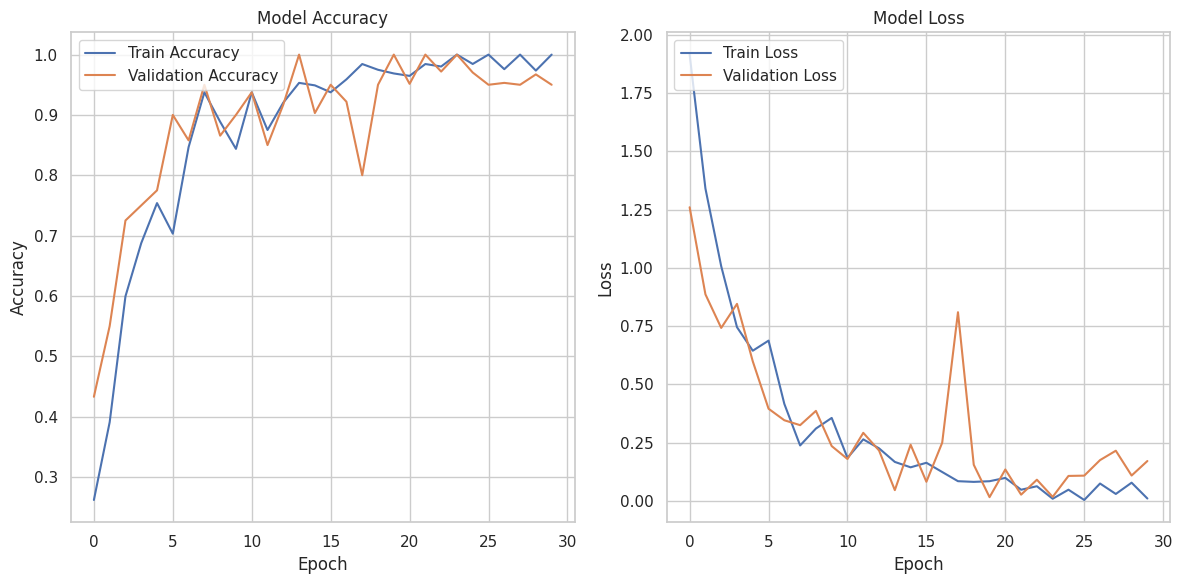

In [ ]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

**VGG19**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for your dataset
train_path = '/content/train'
test_path = '/content/test'
val_path = '/content/validation'
modelsave_path = "/content/VGG19_model.keras"

# Load and preprocess data using ImageDataGenerator
batch_size = 64  # Set your desired batch size
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)

# Import VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build a custom classification model on top of VGG19
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))  # Add Dropout layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))  # Add Dropout layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Freeze the pretrained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
checkpoint = ModelCheckpoint(modelsave_path, monitor='val_accuracy', save_best_only=True, mode='max')
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=val_generator, validation_steps=val_generator.samples // batch_size,
                    epochs=30, callbacks=[checkpoint])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Accuracy:", test_acc)

# Save the final model
model.save(modelsave_path)

Found 5280 images belonging to 11 classes.
Found 660 images belonging to 11 classes.
Found 660 images belonging to 11 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 68s 533ms/step - accuracy: 0.4755 - loss: 1.5891 - val_accuracy: 0.8922 - val_loss: 0.3736
Epoch 2/30
 1/82 ━━━━━━━━━━━━━━━━━━━━ 23s 294ms/step - accuracy: 0.9062 - loss: 0.4778

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.9062 - loss: 0.4778 - val_accuracy: 0.9500 - val_loss: 0.3110
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 35s 338ms/step - accuracy: 0.8898 - loss: 0.3325 - val_accuracy: 0.9391 - val_loss: 0.1942
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9531 - loss: 0.2207 - val_accuracy: 1.0000 - val_loss: 0.0912
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 29s 342ms/step - accuracy: 0.9464 - loss: 0.1633 - val_accuracy: 0.9469 - val_loss: 0.1439
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9531 - loss: 0.1483 - val_accuracy: 1.0000 - val_loss: 0.0458
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 356ms/step - accuracy: 0.9525 - loss: 0.1309 - val_accuracy: 0.9547 - val_loss: 0.1028
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.0849 - val_accuracy: 1.0000 - val_loss: 0.0835
Epoch 9/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 356ms/step - accuracy: 0.9750 - loss: 0.0859 - val_accuracy: 0.9625 - val_l

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step


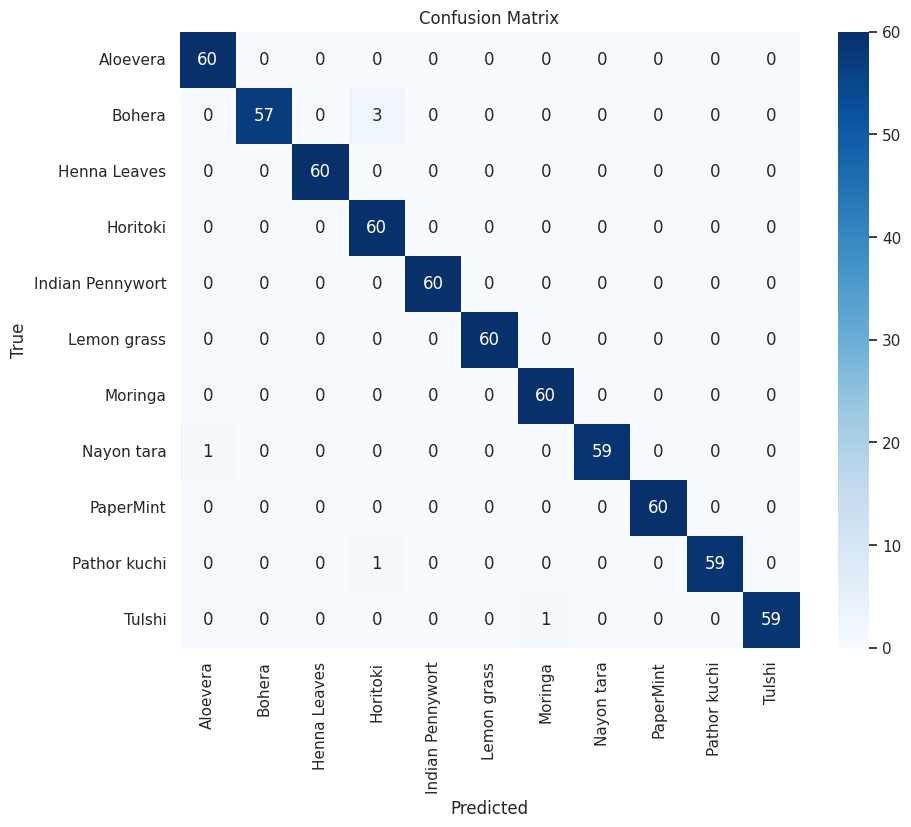

Classification Report
                  precision    recall  f1-score   support

        Aloevera       0.98      1.00      0.99        60
          Bohera       1.00      0.95      0.97        60
    Henna Leaves       1.00      1.00      1.00        60
        Horitoki       0.94      1.00      0.97        60
Indian Pennywort       1.00      1.00      1.00        60
     Lemon grass       1.00      1.00      1.00        60
         Moringa       0.98      1.00      0.99        60
      Nayon tara       1.00      0.98      0.99        60
       PaperMint       1.00      1.00      1.00        60
    Pathor kuchi       1.00      0.98      0.99        60
          Tulshi       1.00      0.98      0.99        60

        accuracy                           0.99       660
       macro avg       0.99      0.99      0.99       660
    weighted avg       0.99      0.99      0.99       660



In [ ]:
# Predict the labels of the test data
Y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred[:test_generator.samples])
cm_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred[:test_generator.samples], target_names=cm_labels))

In [ ]:
# Calculate and print class-wise accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)
for i, label in enumerate(cm_labels):
    print(f'Accuracy for class {label}: {class_accuracies[i] * 100:.2f}%')

Accuracy for class Aloevera: 100.00%
Accuracy for class Bohera: 95.00%
Accuracy for class Henna Leaves: 100.00%
Accuracy for class Horitoki: 100.00%
Accuracy for class Indian Pennywort: 100.00%
Accuracy for class Lemon grass: 100.00%
Accuracy for class Moringa: 100.00%
Accuracy for class Nayon tara: 98.33%
Accuracy for class PaperMint: 100.00%
Accuracy for class Pathor kuchi: 98.33%
Accuracy for class Tulshi: 98.33%


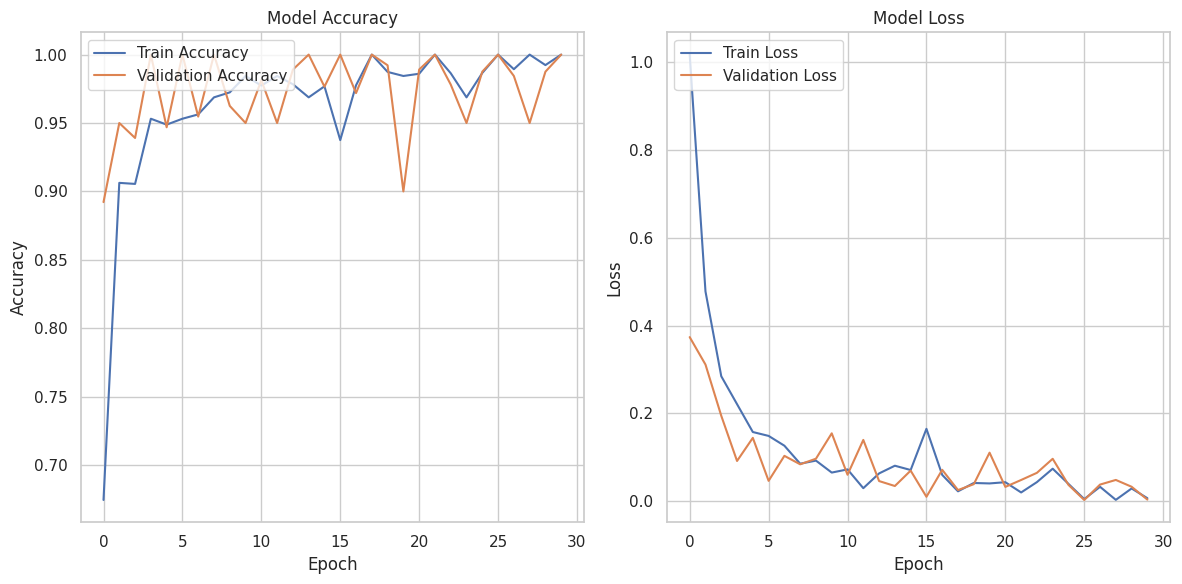

In [ ]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

**ResNet50**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths for your dataset
train_path = '/content/train'
test_path = '/content/test'
val_path = '/content/validation'
modelsave_path = "/content/ResNet50_model.keras"

# Load and preprocess data using ImageDataGenerator
batch_size = 64  # Set your desired batch size
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)

# Import ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build a custom classification model on top of ResNet50
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))  # Add Dropout layer with 50% rate
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))  # Add Dropout layer with 50% rate
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Freeze the pretrained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
checkpoint = ModelCheckpoint(modelsave_path, monitor='val_accuracy', save_best_only=True, mode='max')
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=val_generator, validation_steps=val_generator.samples // batch_size,
                    epochs=30, callbacks=[checkpoint])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Accuracy:", test_acc)

# Save the final model
model.save(modelsave_path)


Found 5280 images belonging to 11 classes.
Found 660 images belonging to 11 classes.
Found 660 images belonging to 11 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 49s 370ms/step - accuracy: 0.1463 - loss: 2.4167 - val_accuracy: 0.3547 - val_loss: 1.7360
Epoch 2/30
 1/82 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - accuracy: 0.3906 - loss: 1.6870

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.3906 - loss: 1.6870 - val_accuracy: 0.4500 - val_loss: 1.8014
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 24s 274ms/step - accuracy: 0.3369 - loss: 1.6977 - val_accuracy: 0.4594 - val_loss: 1.4526
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.3906 - loss: 1.4711 - val_accuracy: 0.4500 - val_loss: 1.5892
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 22s 249ms/step - accuracy: 0.3936 - loss: 1.5310 - val_accuracy: 0.4359 - val_loss: 1.3949
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.4219 - loss: 1.4669 - val_accuracy: 0.4500 - val_loss: 1.3474
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 27s 321ms/step - accuracy: 0.4704 - loss: 1.3696 - val_accuracy: 0.5469 - val_loss: 1.2655
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.5156 - loss: 1.3222 - val_accuracy: 0.5000 - val_loss: 1.4027
Epoch 9/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 34s 241ms/step - accuracy: 0.5168 - loss: 1.2535 - val_accuracy: 0.4984 - v

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 456ms/step


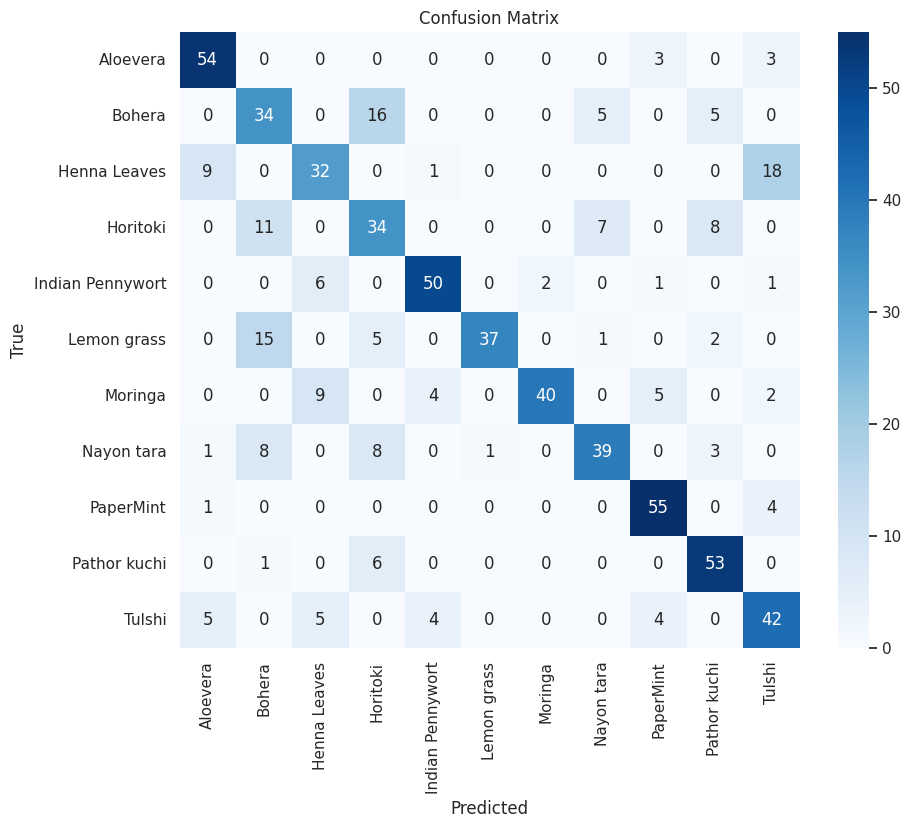

Classification Report
                  precision    recall  f1-score   support

        Aloevera       0.77      0.90      0.83        60
          Bohera       0.49      0.57      0.53        60
    Henna Leaves       0.62      0.53      0.57        60
        Horitoki       0.49      0.57      0.53        60
Indian Pennywort       0.85      0.83      0.84        60
     Lemon grass       0.97      0.62      0.76        60
         Moringa       0.95      0.67      0.78        60
      Nayon tara       0.75      0.65      0.70        60
       PaperMint       0.81      0.92      0.86        60
    Pathor kuchi       0.75      0.88      0.81        60
          Tulshi       0.60      0.70      0.65        60

        accuracy                           0.71       660
       macro avg       0.73      0.71      0.71       660
    weighted avg       0.73      0.71      0.71       660



In [ ]:
# Predict the labels of the test data
Y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred[:test_generator.samples])
cm_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred[:test_generator.samples], target_names=cm_labels))

In [ ]:
# Calculate and print class-wise accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)
for i, label in enumerate(cm_labels):
    print(f'Accuracy for class {label}: {class_accuracies[i] * 100:.2f}%')

Accuracy for class Aloevera: 90.00%
Accuracy for class Bohera: 56.67%
Accuracy for class Henna Leaves: 53.33%
Accuracy for class Horitoki: 56.67%
Accuracy for class Indian Pennywort: 83.33%
Accuracy for class Lemon grass: 61.67%
Accuracy for class Moringa: 66.67%
Accuracy for class Nayon tara: 65.00%
Accuracy for class PaperMint: 91.67%
Accuracy for class Pathor kuchi: 88.33%
Accuracy for class Tulshi: 70.00%


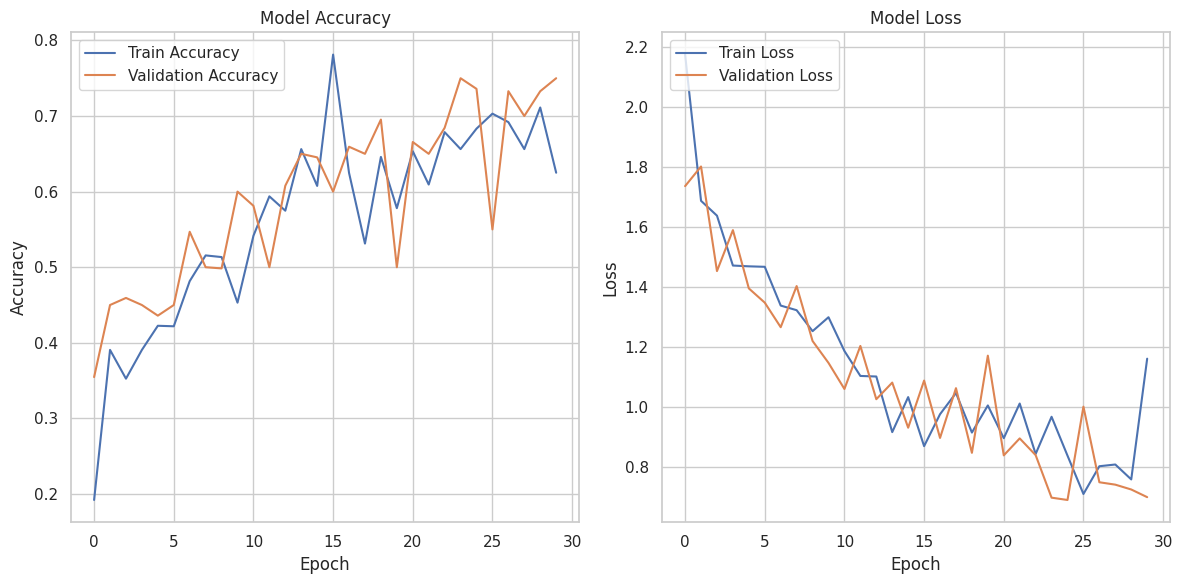

In [ ]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

**VGG16**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths for your dataset
train_path = '/content/train'
test_path = '/content/test'
val_path = '/content/validation'
modelsave_path = "/content/VGG16_model.keras"

# Load and preprocess data using ImageDataGenerator
batch_size = 64  # Set your desired batch size
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)

# Import VGG16 model, without the top dense layers (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build a custom classification model on top of VGG16
model = Sequential()
model.add(base_model)  # Add the VGG16 model
model.add(GlobalAveragePooling2D())  # Pooling layer to reduce dimensionality
model.add(Dense(1024, activation='relu'))  # Dense layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(512, activation='relu'))  # Another dense layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(train_generator.num_classes, activation='softmax'))  # Final output layer for classification

# Freeze the pretrained layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up a model checkpoint to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(modelsave_path, monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=val_generator, validation_steps=val_generator.samples // batch_size,
                    epochs=30, callbacks=[checkpoint])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Accuracy:", test_acc)

# Save the final model
model.save(modelsave_path)


Found 5280 images belonging to 11 classes.
Found 660 images belonging to 11 classes.
Found 660 images belonging to 11 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 327ms/step - accuracy: 0.3734 - loss: 1.7928 - val_accuracy: 0.9078 - val_loss: 0.3363
Epoch 2/30
 1/82 ━━━━━━━━━━━━━━━━━━━━ 18s 232ms/step - accuracy: 0.8438 - loss: 0.4910

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8438 - loss: 0.4910 - val_accuracy: 0.9500 - val_loss: 0.2599
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 34s 292ms/step - accuracy: 0.8779 - loss: 0.3967 - val_accuracy: 0.9625 - val_loss: 0.1307
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9844 - loss: 0.1306 - val_accuracy: 0.9000 - val_loss: 0.2536
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 28s 323ms/step - accuracy: 0.9346 - loss: 0.1981 - val_accuracy: 0.9734 - val_loss: 0.0868
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9375 - loss: 0.1664 - val_accuracy: 1.0000 - val_loss: 0.0807
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 38s 294ms/step - accuracy: 0.9502 - loss: 0.1410 - val_accuracy: 0.9719 - val_loss: 0.0846
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9844 - loss: 0.0805 - val_accuracy: 1.0000 - val_loss: 0.0414
Epoch 9/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 38s 296ms/step - accuracy: 0.9658 - loss: 0.1017 - val_accuracy: 0.9875 - val_l

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step


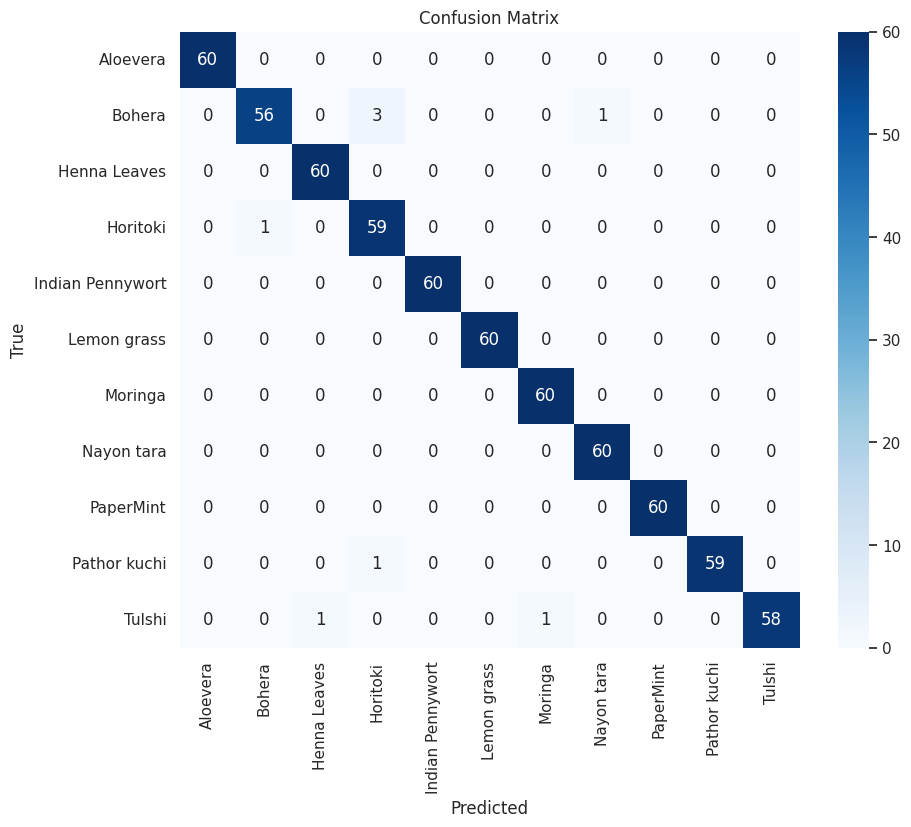

Classification Report
                  precision    recall  f1-score   support

        Aloevera       1.00      1.00      1.00        60
          Bohera       0.98      0.93      0.96        60
    Henna Leaves       0.98      1.00      0.99        60
        Horitoki       0.94      0.98      0.96        60
Indian Pennywort       1.00      1.00      1.00        60
     Lemon grass       1.00      1.00      1.00        60
         Moringa       0.98      1.00      0.99        60
      Nayon tara       0.98      1.00      0.99        60
       PaperMint       1.00      1.00      1.00        60
    Pathor kuchi       1.00      0.98      0.99        60
          Tulshi       1.00      0.97      0.98        60

        accuracy                           0.99       660
       macro avg       0.99      0.99      0.99       660
    weighted avg       0.99      0.99      0.99       660



In [ ]:
# Predict the labels of the test data
Y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred[:test_generator.samples])
cm_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred[:test_generator.samples], target_names=cm_labels))

In [ ]:
# Calculate and print class-wise accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)
for i, label in enumerate(cm_labels):
    print(f'Accuracy for class {label}: {class_accuracies[i] * 100:.2f}%')

Accuracy for class Aloevera: 100.00%
Accuracy for class Bohera: 93.33%
Accuracy for class Henna Leaves: 100.00%
Accuracy for class Horitoki: 98.33%
Accuracy for class Indian Pennywort: 100.00%
Accuracy for class Lemon grass: 100.00%
Accuracy for class Moringa: 100.00%
Accuracy for class Nayon tara: 100.00%
Accuracy for class PaperMint: 100.00%
Accuracy for class Pathor kuchi: 98.33%
Accuracy for class Tulshi: 96.67%


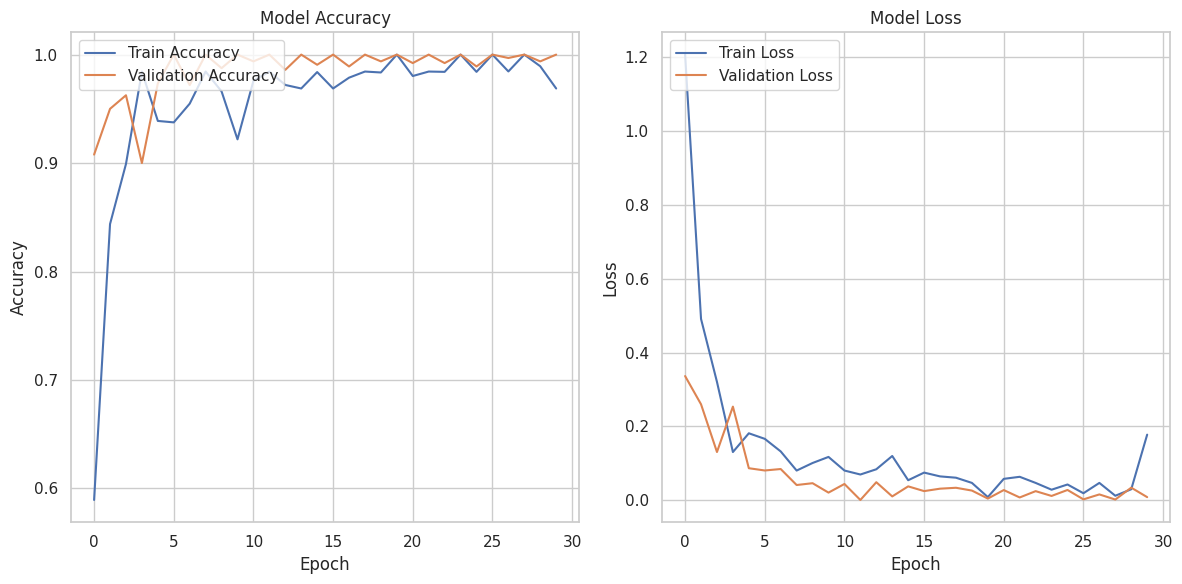

In [ ]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

**MediPlantNet**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Concatenate, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for your dataset
train_path = '/content/train'
test_path = '/content/test'
val_path = '/content/validation'
modelsave_path = "/content/hybrid_model.keras"

# Load and preprocess data using ImageDataGenerator
batch_size = 64
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)

# Define the hybrid model with both VGG19 and MobileNetV2 inputs
input_shape = (224, 224, 3)
vgg_input = Input(shape=input_shape)
mobilenet_input = Input(shape=input_shape)

# Load pre-trained VGG19 and MobileNetV2 models without top layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_tensor=vgg_input)
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_tensor=mobilenet_input)

# Freeze the layers of both pre-trained models
for layer in vgg_base.layers:
    layer.trainable = False
for layer in mobilenet_base.layers:
    layer.trainable = False

# Add custom layers on top of both models
vgg_output = GlobalAveragePooling2D()(vgg_base.output)
mobilenet_output = GlobalAveragePooling2D()(mobilenet_base.output)

# Concatenate the outputs from both models
combined = Concatenate()([vgg_output, mobilenet_output])

# Add fully connected layers
x = Dense(1024, activation='relu')(combined)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the final hybrid model
model = Model(inputs=[vgg_base.input, mobilenet_base.input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Custom data generator to feed two inputs to the model
def hybrid_data_generator(generator):
    while True:
        batch_x, batch_y = next(generator)
        # Yield a tuple of two identical inputs and one output
        yield ([batch_x, batch_x], batch_y)

# Create tf.data.Dataset using a structured generator output
def create_dataset(generator):
    return tf.data.Dataset.from_generator(
        lambda: hybrid_data_generator(generator),
        output_signature=(
            (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
             tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),
            tf.TensorSpec(shape=(None, train_generator.num_classes), dtype=tf.float32)
        )
    )

# Create train, validation, and test datasets
train_dataset = create_dataset(train_generator)
val_dataset = create_dataset(val_generator)
test_dataset = create_dataset(test_generator)

# Train the model using the dataset
checkpoint = ModelCheckpoint(modelsave_path, monitor='val_accuracy', save_best_only=True, mode='max')
history = model.fit(train_dataset, steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=val_dataset, validation_steps=val_generator.samples // batch_size,
                    epochs=30, callbacks=[checkpoint])

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset, steps=test_generator.samples // batch_size)
print("Test Accuracy:", test_acc)

# Save the final model
model.save(modelsave_path)


Found 5280 images belonging to 11 classes.
Found 660 images belonging to 11 classes.
Found 660 images belonging to 11 classes.


<ipython-input-51-3112d32a4ff8>:32: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_tensor=mobilenet_input)


Epoch 1/30


InvalidArgumentError: Graph execution error:

2 root error(s) found.
  (0) INVALID_ARGUMENT:  TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was ((tf.float32, tf.float32), tf.float32), but the yielded element was ([array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]],


       [[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]],


       [[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.02352941, 0.02352941, 0.02352941],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.02352941, 0.02352941, 0.02352941],
         [0.01568628, 0.01568628, 0.01568628],
         [0.        , 0.        , 0.        ]],

        [[0.01176471, 0.01176471, 0.01176471],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.01176471, 0.01176471, 0.01176471],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.01176471, 0.01176471, 0.01176471]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.01960784, 0.01960784, 0.01960784],
         [0.        , 0.        , 0.        ]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]],


       ...,


       [[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]]],


       [[[0.45098042, 0.45098042, 0.45098042],
         [0.63529414, 0.63529414, 0.63529414],
         [0.57254905, 0.57254905, 0.57254905],
         ...,
         [0.49803925, 0.49803925, 0.49803925],
         [0.3254902 , 0.3254902 , 0.3254902 ],
         [0.40784317, 0.40784317, 0.40784317]],

        [[0.4431373 , 0.4431373 , 0.4431373 ],
         [0.6862745 , 0.6862745 , 0.6862745 ],
         [0.6392157 , 0.6392157 , 0.6392157 ],
         ...,
         [0.69803923, 0.69803923, 0.69803923],
         [0.7058824 , 0.7058824 , 0.7058824 ],
         [0.74509805, 0.74509805, 0.74509805]],

        [[0.43529415, 0.43529415, 0.43529415],
         [0.5764706 , 0.5764706  [Op:__inference_one_step_on_iterator_335864]

In [ ]:
# Predict the labels of the test data
Y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred[:test_generator.samples])
cm_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred[:test_generator.samples], target_names=cm_labels))

In [ ]:
# Calculate and print class-wise accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)
for i, label in enumerate(cm_labels):
    print(f'Accuracy for class {label}: {class_accuracies[i] * 100:.2f}%')

In [ ]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()